# MLDM Lab 2
- CB.EN.U4CSE17040



In [1]:
from scipy.spatial.distance import hamming
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial import minkowski_distance as minkowski
from math import *

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from random import sample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Hamming Distance

In [2]:
def hamming_distance(a, b):
    return sum(abs(item1 - item2) for item1, item2 in zip(a, b)) / len(a)

In [3]:
row1 = [0, 0, 0, 0, 0, 1]
row2 = [0, 0, 0, 0, 1, 0]
hamming_distance(row1, row2)

0.3333333333333333

In [4]:
hamming(row1, row2)

0.3333333333333333

## Euclidean Distance

In [5]:
def euclidean_distance(a, b):
    return sqrt(sum((item1-item2)**2 for item1, item2 in zip(a,b)))

In [6]:
row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]
euclidean_distance(row1, row2)

6.082762530298219

In [7]:
euclidean(row1, row2)

6.082762530298219

## Manhattan Distance

In [8]:
def manhattan_distance(a, b):
    return sum(abs(item1-item2) for item1, item2 in zip(a,b))

In [9]:
manhattan_distance(row1, row2)

13

In [10]:
cityblock(row1, row2)

13

## Minkowski Distance

In [11]:
def minkowski_distance(a, b, p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

In [12]:
minkowski_distance(row1, row2, 1)

13.0

In [13]:
minkowski_distance(row1, row2, 2)

6.082762530298219

In [14]:
minkowski(row1, row2, 1)

13.0

In [15]:
minkowski(row1, row2, 2)

6.082762530298219

## Cosine Similarity

In [16]:
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

In [17]:
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),4)

In [18]:
cosine_similarity(row1, row2)

0.9932

## Jaccard Similarity

In [19]:
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

In [20]:
jaccard_similarity(row1, row2)

0.0

In [21]:
jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9])

0.375

# Loan Status

In [22]:
data = pd.read_csv("loan_status.csv")
data.head()

,grade,sub_grade,loan_status,purpose
0,B,B2,Fully Paid,credit_card
1,C,C4,Charged Off,car
2,C,C5,Fully Paid,small_business
3,C,C1,Fully Paid,other
4,B,B5,Fully Paid,other


In [23]:
data.describe()

,grade,sub_grade,loan_status,purpose
count,50,50,50,50
unique,6,19,2,10
top,B,B3,Fully Paid,debt_consolidation
freq,21,6,39,22


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   grade        50 non-null     object
 1   sub_grade    50 non-null     object
 2   loan_status  50 non-null     object
 3   purpose      50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [25]:
data.dtypes

grade          object
sub_grade      object
loan_status    object
purpose        object
dtype: object

In [26]:
data_crosstab = pd.crosstab(data['grade'],data['loan_status'], margins = False)
data_crosstab

loan_status,Charged Off,Fully Paid
grade,,
A,1,11
B,5,16
C,3,8
D,1,3
E,0,1
F,1,0


In [27]:
data_crosstab = pd.crosstab(data['purpose'],data['loan_status'], margins = False)
data_crosstab

loan_status,Charged Off,Fully Paid
purpose,,
car,1,1
credit_card,0,8
debt_consolidation,4,18
home_improvement,0,1
major_purchase,1,1
medical,0,1
moving,0,1
other,4,5
small_business,1,2


In [28]:
data_crosstab = pd.crosstab([data['grade'], data['purpose']],data['loan_status'], margins = False)
data_crosstab

loan_status               Charged Off  Fully Paid
grade purpose                                    
A     credit_card                   0           1
      debt_consolidation            1           7
      major_purchase                0           1
      other                         0           1
      wedding                       0           1
B     credit_card                   0           6
      debt_consolidation            1           5
      major_purchase                1           0
      medical                       0           1
      moving                        0           1
      other                         3           2
      small_business                0           1
C     car                           1           0
      credit_card                   0           1
      debt_consolidation            2           4
      home_improvement              0           1
      other                         0           1
      small_business                0           1
D     debt_consolidation            0           2
      other                         1           1
E     car                           0           1
F     small_business                1           0

In [29]:
le = LabelEncoder()
df = data.copy()
df['grade'] = le.fit_transform(data['grade'])#, 'sub_grade', 'purpose' ,'loan_status']])
df['sub_grade'] = le.fit_transform(data['sub_grade'])
df['purpose'] = le.fit_transform(data['purpose'])
df['loan_status'] = le.fit_transform(data['loan_status'])
df.head()

,grade,sub_grade,loan_status,purpose
0,1,5,1,1
1,2,12,0,0
2,2,13,1,8
3,2,9,1,7
4,1,8,1,7


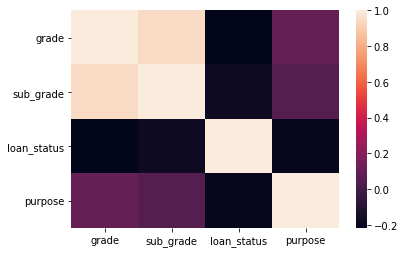

In [30]:
sns.heatmap(df.corr())

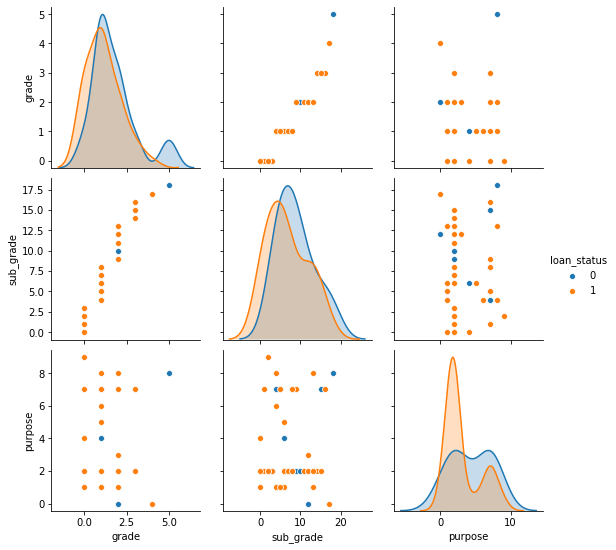

In [31]:
sns.pairplot(df, hue='loan_status')

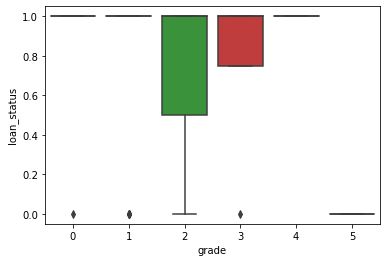

In [32]:
sns.boxplot(df['grade'], df['loan_status'])

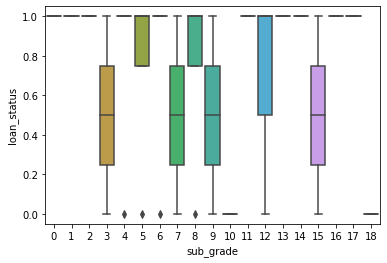

In [33]:
sns.boxplot(df['sub_grade'], df['loan_status'])

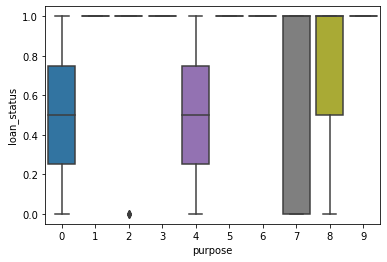

In [34]:
sns.boxplot(df['purpose'], df['loan_status'])

# Data1.csv

In [35]:
data = pd.read_csv('Data-1.csv')
data.head()

,Country,Age,Salary,Purchased,Color
0,France,44.0,72000,No,Red
1,Spain,27.0,48000,Yes,Yellow
2,Germany,30.0,54000,No,Green
3,Spain,38.0,61000,No,Green
4,Germany,40.0,na,Yes,Yellow


In [36]:
data.describe()

,Age
count,114.000000
mean,39.842105
std,11.831845
min,27.000000
25%,31.000000
50%,38.000000
75%,44.000000
max,89.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    120 non-null    object 
 1   Age        114 non-null    float64
 2   Salary     120 non-null    object 
 3   Purchased  108 non-null    object 
 4   Color      120 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.8+ KB


In [38]:
data.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [39]:
data.isnull().sum()

Country       0
Age           6
Salary        0
Purchased    12
Color         0
dtype: int64

In [40]:
data['Age'].fillna(method='ffill', inplace=True)
data['Purchased'].fillna(method='ffill', inplace=True)

In [41]:
int(data['Salary'][0])

72000

In [42]:
data.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
Color        0
dtype: int64

In [43]:
for i in range(len(data['Salary'])):
    try:
        data['Salary'][i] = int(data['Salary'][i])
    except:
        data['Salary'][i] = 0

/home/vkmanojk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vkmanojk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
df = data.copy()
df['Country'] = le.fit_transform(data['Country'])
df['Purchased'] = le.fit_transform(data['Purchased'])
df['Color'] = le.fit_transform(data['Color'])
df.head()

,Country,Age,Salary,Purchased,Color
0,0,44.0,72000,0,1
1,2,27.0,48000,1,2
2,1,30.0,54000,0,0
3,2,38.0,61000,0,0
4,1,40.0,0,1,2


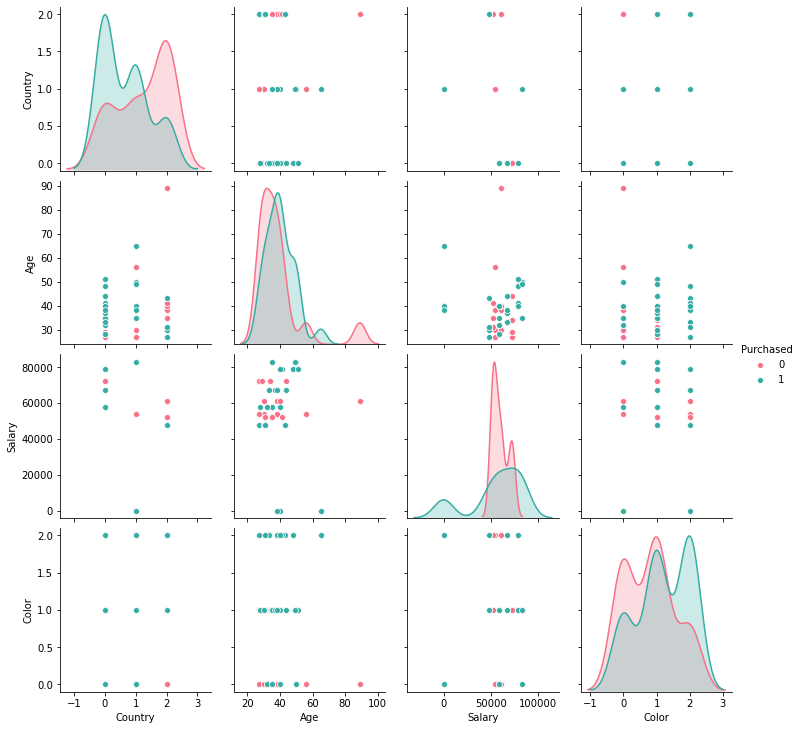

In [45]:
sns.pairplot(df, hue = 'Purchased',palette="husl")

## Cross tab

In [46]:
pd.crosstab(data['Country'], data['Purchased'])

Purchased,No,Yes
Country,,
France,12,36
Germany,12,24
Spain,24,12


In [47]:
pd.crosstab(data['Age'], data['Purchased'])

Purchased,No,Yes
Age,,
27.0,6,3
28.0,0,3
29.0,3,0
30.0,6,3
31.0,3,3
32.0,0,3
33.0,0,3
34.0,3,0
35.0,6,6


In [48]:
pd.crosstab(data['Salary'], data['Purchased'])

Purchased,No,Yes
Salary,,
0,0,12
48000,0,12
52000,12,0
54000,12,0
58000,0,12
61000,12,0
67000,0,12
72000,12,0
79000,0,12


In [49]:
pd.crosstab(data['Color'], data['Purchased'])

Purchased,No,Yes
Color,,
Green,18,15
Red,21,27
Yellow,9,30


## Box plot

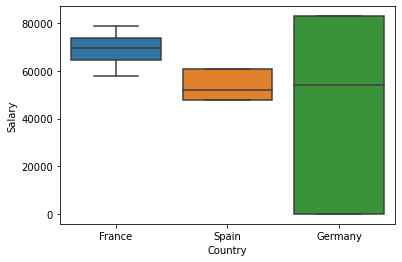

In [50]:
sns.boxplot(data['Country'], data['Salary'])

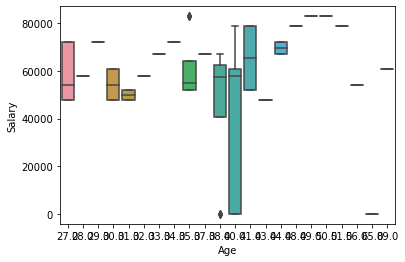

In [51]:
sns.boxplot(data['Age'], data['Salary'])

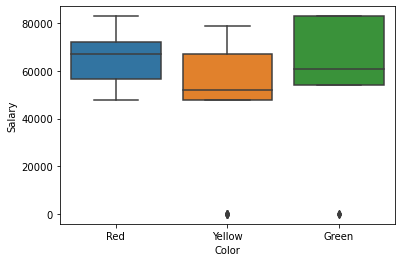

In [52]:
sns.boxplot(data['Color'], data['Salary'])

In [53]:
scaler = MinMaxScaler()
data[['Age', 'Salary']] = scaler.fit_transform(data[['Age','Salary']])

In [54]:
colors = [color for color in data['Color'].unique()]
colors

['Red', 'Yellow', 'Green']

In [55]:
transformedColors = pd.get_dummies(colors)
transformedColors

,Green,Red,Yellow
0,0,1,0
1,0,0,1
2,1,0,0


In [56]:
countries = [country for country in data['Country'].unique()]
countries

['France', 'Spain', 'Germany']

In [57]:
transformedCountries = pd.get_dummies(countries)
transformedCountries

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0


## Hamming Distance

In [58]:
print('Hamming distance between Green and Red')
hamming(transformedColors.Green.values,transformedColors.Red.values)

Hamming distance between Green and Red


0.6666666666666666

In [59]:
print('Hamming distance between Green and Yellow')
hamming(transformedColors.Green.values,transformedColors.Yellow.values)

Hamming distance between Green and Yellow


0.6666666666666666

In [60]:
print('Hamming distance between Yellow and Red')
hamming(transformedColors.Yellow.values,transformedColors.Red.values)

Hamming distance between Yellow and Red


0.6666666666666666

In [61]:
print('Hamming distance between France and Germany')
hamming(transformedCountries.France.values,transformedCountries.Germany.values)

Hamming distance between France and Germany


0.6666666666666666

In [62]:
print('Hamming distance between France and Spain')
hamming(transformedCountries.France.values,transformedCountries.Spain.values)

Hamming distance between France and Spain


0.6666666666666666

In [63]:
print('Hamming distance between Spain and Germany')
hamming(transformedCountries.Spain.values,transformedCountries.Germany.values)

Hamming distance between Spain and Germany


0.6666666666666666

## Euclidean Distance

In [64]:
purchased = data['Salary'][data['Purchased']=='Yes']
notPurchased = data['Salary'][data['Purchased']=='No']

In [65]:
print("Euclidean distance between salaries of those who purchased and those who didn't")
euclidean_distance(purchased.values[:len(notPurchased)], notPurchased.values)

Euclidean distance between salaries of those who purchased and those who didn't


2.2761839138049376

In [66]:
purchased = data['Age'][data['Purchased']=='Yes']
notPurchased = data['Age'][data['Purchased']=='No']

In [67]:
print("Euclidean distance between ages of those who purchased and those who didn't")
euclidean_distance(purchased.values[:len(notPurchased)], notPurchased.values)

Euclidean distance between ages of those who purchased and those who didn't


2.007270862723103

In [68]:
print("Euclidean distance between age and salary")
euclidean_distance(data['Salary'].values, data['Age'].values)

Euclidean distance between age and salary


6.421416331269408

## Manhattan Distance

In [69]:
purchased = data['Salary'][data['Purchased']=='Yes']
notPurchased = data['Salary'][data['Purchased']=='No']
print("Manhattan distance between salaries of those who purchased and those who didn't")
manhattan_distance(purchased.values[:len(notPurchased)], notPurchased.values)

Manhattan distance between salaries of those who purchased and those who didn't


13.1566265060241

In [70]:
purchased = data['Age'][data['Purchased']=='Yes']
notPurchased = data['Age'][data['Purchased']=='No']
print("Manhattan distance between ages of those who purchased and those who didn't")
manhattan_distance(purchased.values[:len(notPurchased)], notPurchased.values)

Manhattan distance between ages of those who purchased and those who didn't


9.870967741935482

In [71]:
print("Manhattan distance between age and salary")
manhattan_distance(data['Salary'].values, data['Age'].values)

Manhattan distance between age and salary


67.20734551107658

## Minkowski Distance

In [72]:
purchased = data['Salary'][data['Purchased']=='Yes']
notPurchased = data['Salary'][data['Purchased']=='No']
print("Minkowski distance between salaries of those who purchased and those who didn't with power 50")
minkowski_distance(purchased.values[:len(notPurchased)], notPurchased.values, 50)

Minkowski distance between salaries of those who purchased and those who didn't with power 50


0.6707834228068674

In [73]:
purchased = data['Age'][data['Purchased']=='Yes']
notPurchased = data['Age'][data['Purchased']=='No']
print("Minkowski distance between ages of those who purchased and those who didn't with power 50")
minkowski_distance(purchased.values[:len(notPurchased)], notPurchased.values, 50)

Minkowski distance between ages of those who purchased and those who didn't with power 50


0.9205480696375034

In [74]:
print("Minkowski distance between age and salary with power 50")
minkowski_distance(data['Salary'].values, data['Age'].values, 50)

Minkowski distance between age and salary with power 50


0.9022134220635781

## Cosine Similarity

In [75]:
purchased = data['Salary'][data['Purchased']=='Yes']
notPurchased = data['Salary'][data['Purchased']=='No']
print("Cosine Similarity between salaries of those who purchased and those who didn't")
cosine_similarity(purchased.values[:len(notPurchased)], notPurchased.values)

Cosine Similarity between salaries of those who purchased and those who didn't


0.9016

In [76]:
purchased = data['Age'][data['Purchased']=='Yes']
notPurchased = data['Age'][data['Purchased']=='No']
print("Cosine Similarity between ages of those who purchased and those who didn't")
cosine_similarity(purchased.values[:len(notPurchased)], notPurchased.values)

Cosine Similarity between ages of those who purchased and those who didn't


0.4806

In [77]:
print("Cosine similarity between age and salary")
cosine_similarity(data['Salary'].values, data['Age'].values)

Cosine similarity between age and salary


0.6874

## Jaccard Similarity

In [78]:
purchased = data['Salary'][data['Purchased']=='Yes']
notPurchased = data['Salary'][data['Purchased']=='No']
print("Jaccard Similarity between salaries of those who purchased and those who didn't")
jaccard_similarity(purchased.values[:len(notPurchased)], notPurchased.values)

Jaccard Similarity between salaries of those who purchased and those who didn't


0.0

In [79]:
purchased = data['Age'][data['Purchased']=='Yes']
notPurchased = data['Age'][data['Purchased']=='No']
print("Jaccard Similarity between ages of those who purchased and those who didn't")
jaccard_similarity(purchased.values[:len(notPurchased)], notPurchased.values)

Jaccard Similarity between ages of those who purchased and those who didn't


0.36363636363636365

In [80]:
print("Jaccard similarity between age and salary")
jaccard_similarity(data['Salary'].values, data['Age'].values)

Jaccard similarity between age and salary


0.06666666666666667